  # Breast Cancer Wisconsin (Diagnostic)

## Introduction:-Steps of Project

1.The Data - Exploratory Data Analysis

2.The Variables - Feature Selection

3.The Model - Building a Model

4.The Prediction - Making Predictions with the Model(Highest Accuracy Model)

In [1]:
import numpy as np# import dependencies
import pandas as pd     # data cleaning and manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

## The Data:-

Attribute Information:
1.id

2.diagnosis: M = malignant, B = benign (M=Harmful,B=NotHarmful)
Ten real-valued features are computed for each cell nucleus:

3.radius: distances from center to points on the perimeter

4.texture: standard deviation of gray-scale values

5.perimeter

6.area

7.smoothness: local variation in radius lengths

8.compactness: perimeter^2 / area - 1.0

9.concavity: severity of concave portions of the contour

10.concave points: number of concave portions of the contour

11.symmetry

12.fractal dimension: "coastline approximation" - 1

### Read csv File of Dataset

In [2]:
df=pd.read_csv("data.csv")# read csv file

### DataFrame

In [3]:
df# Dataset of breast cancer study

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Summary of the DataFrame

In [4]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### First And Last 5 Rows using head() and tail()

In [5]:
# read in the data and check the first 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


### Find Null Values

In [7]:
#Check missing and null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## EDA

### Drop Unwanted Column

In [8]:
# remove the 'Unnamed: 32' column
df.drop(columns=["Unnamed: 32"], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.fillna(df.mean(), inplace=True)#fill missing value with mean

### Check Distribution of Data

In [11]:
#To know mean,median,mode(distribution of data)
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Check Correlation of Data

In [12]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## Visualization

### Pair Plot with Mean column

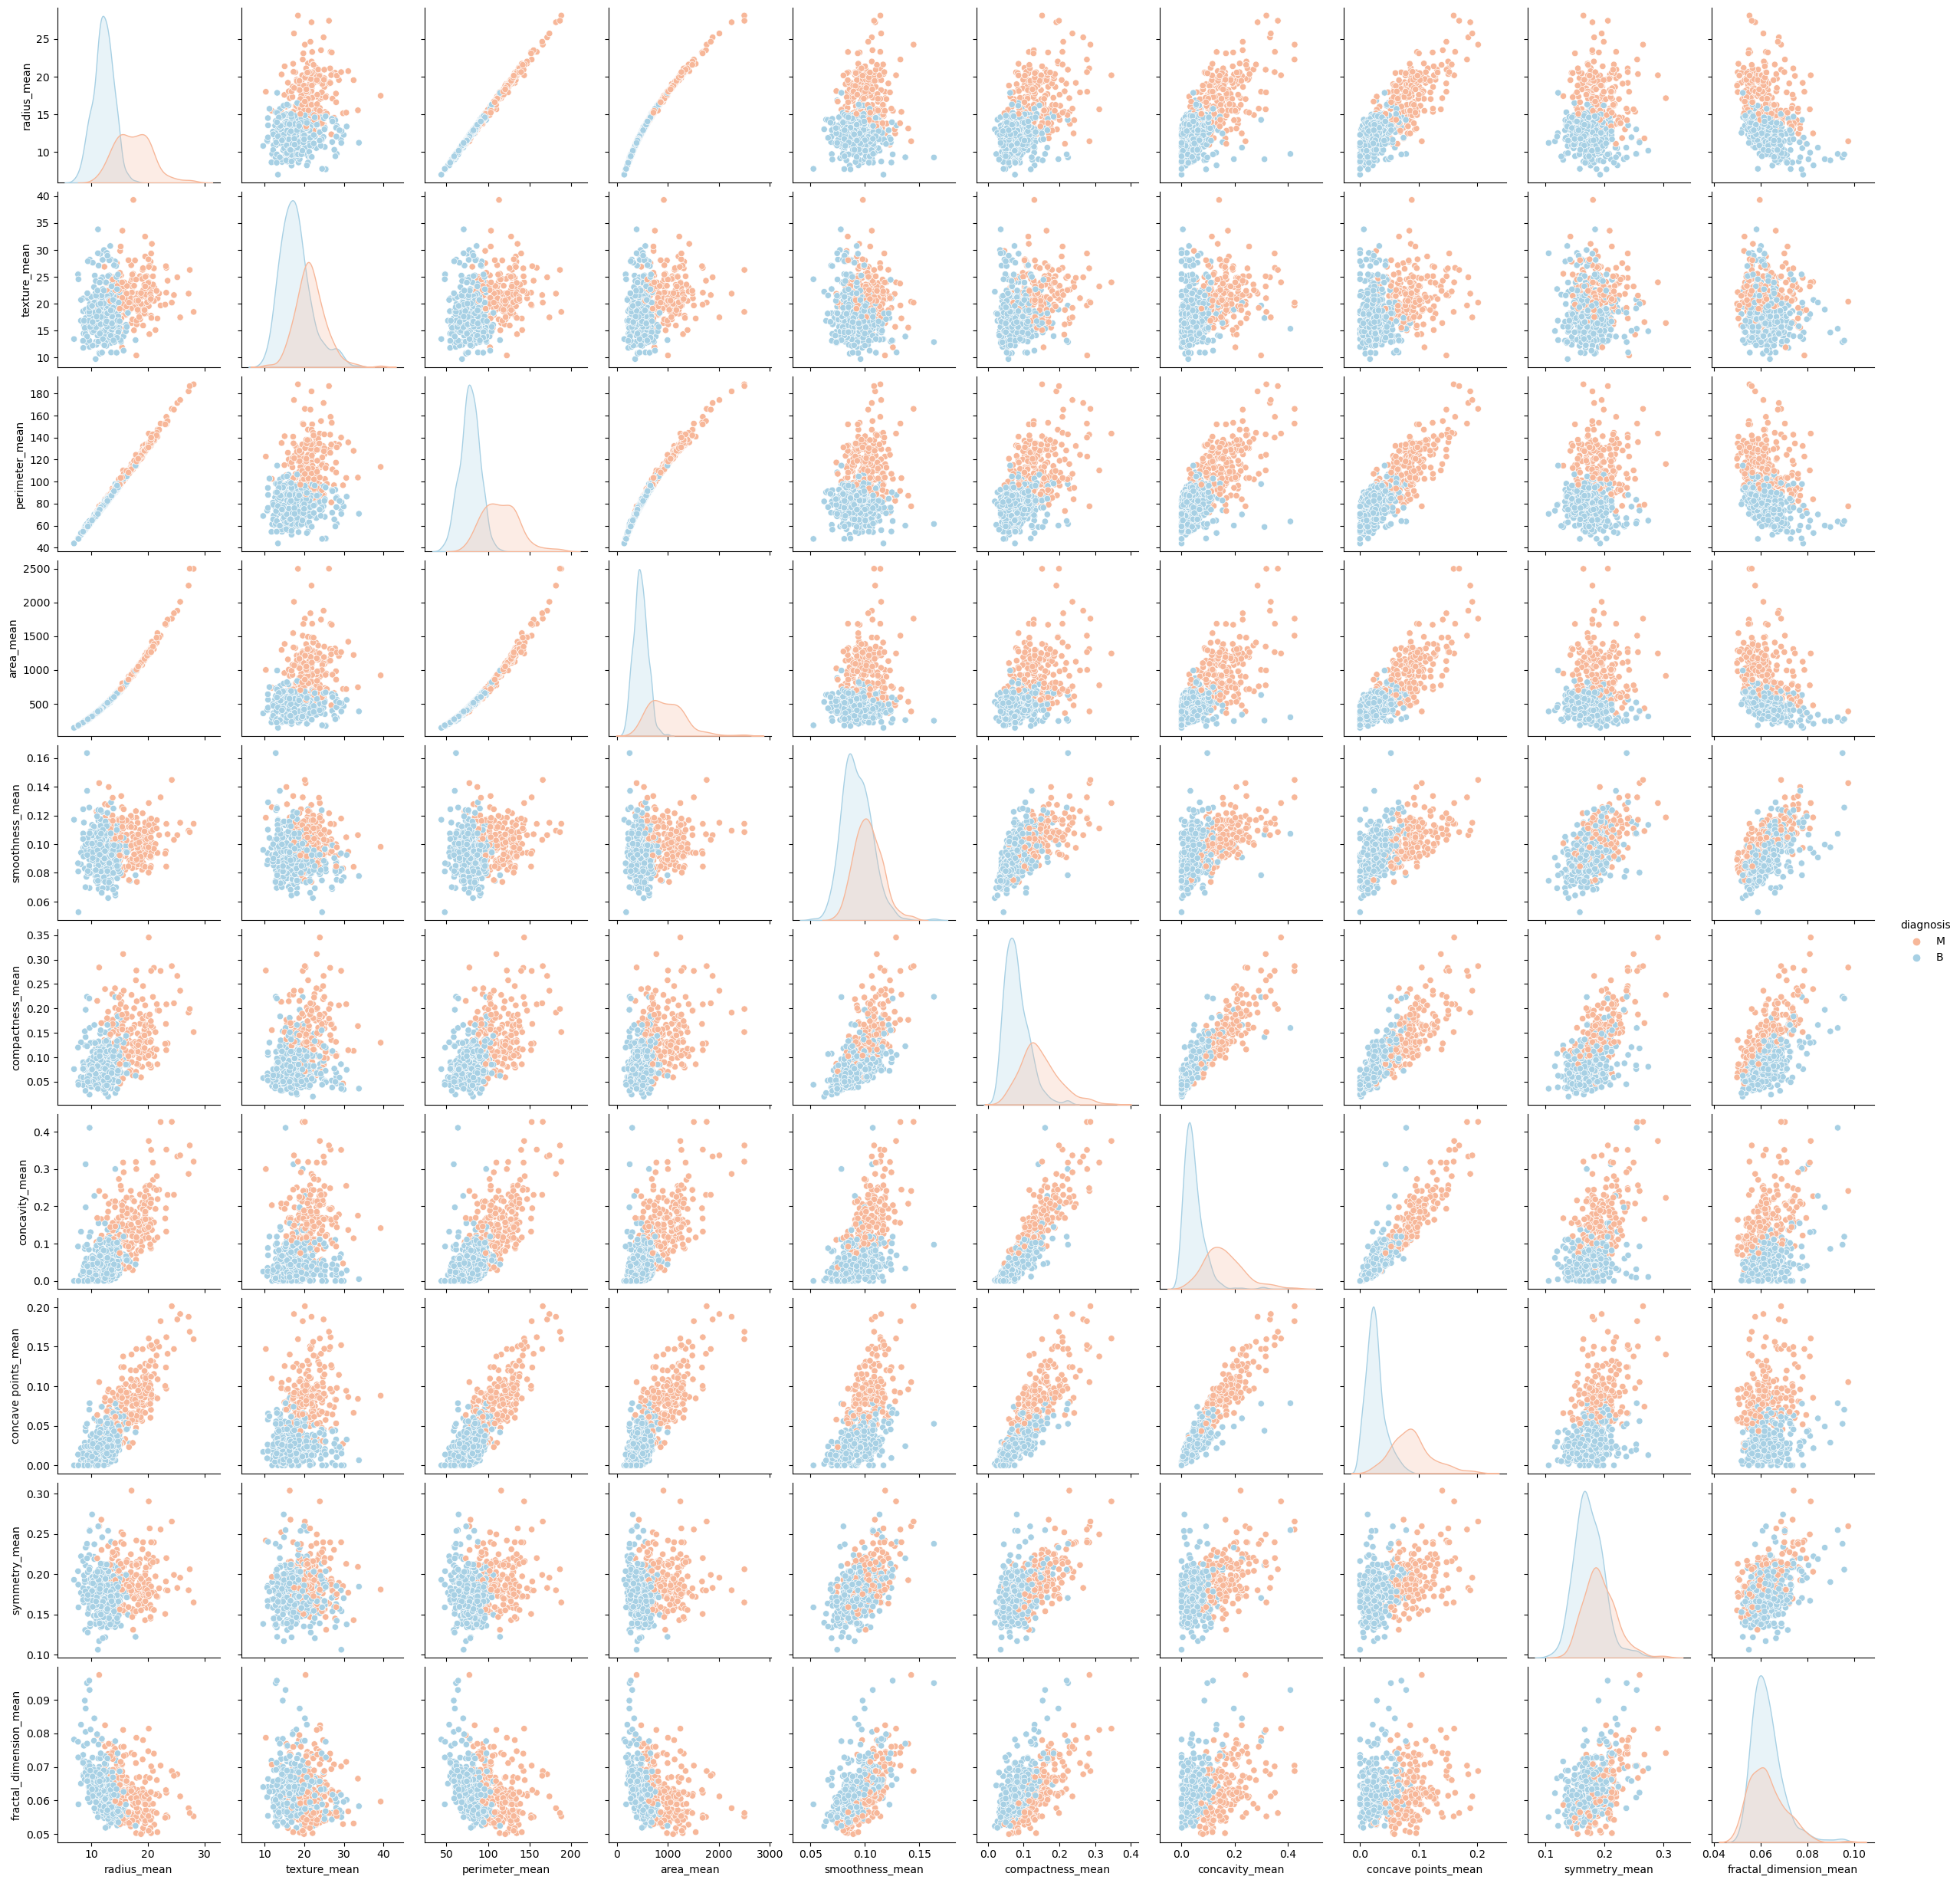

In [13]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

###  Check Distribution of Each column Using Histogram

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>, <Axes: >,
        <Axes: >]], dtype=object)

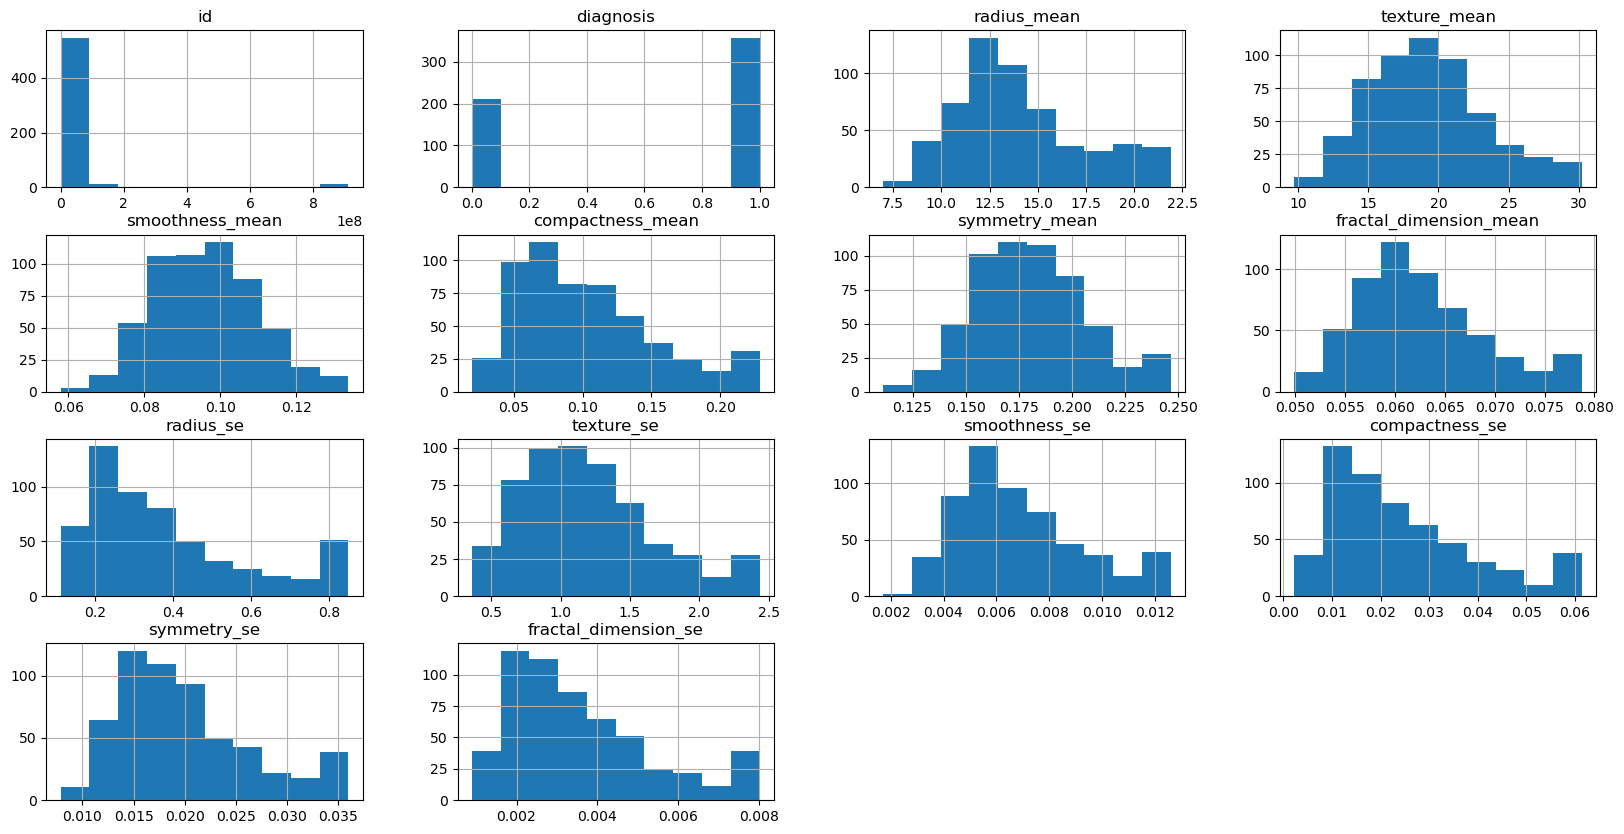

In [75]:
# Visualizing the distribution with curves in the histograms
df.hist(figsize=(20,10))


### Check Value Count of Dignosis Col using Count Plot

Number of cells labeled Benign: 357
Number of cells labeled Malignant: 212

% of cells labeled Benign: 62.74 %
% of cells labeled Malignant: 37.26 %


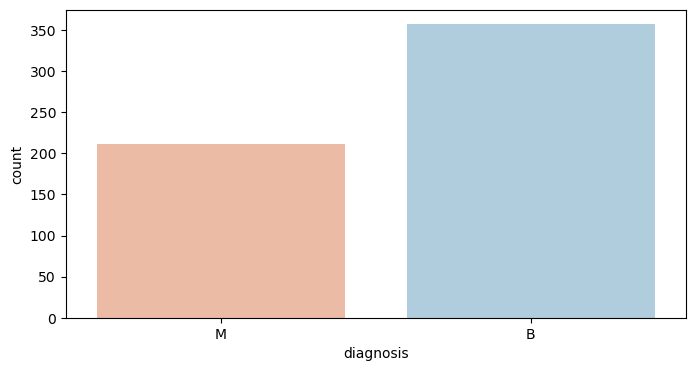

In [15]:
 #visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='diagnosis', palette='RdBu')

# Count the number of observations in each class
benign_count = df['diagnosis'].value_counts()['B']
malignant_count = df['diagnosis'].value_counts()['M']

print('Number of cells labeled Benign:', benign_count)
print('Number of cells labeled Malignant:', malignant_count)
print('')
print('% of cells labeled Benign:', round(benign_count / len(df) * 100, 2), '%')
print('% of cells labeled Malignant:', round(malignant_count / len(df) * 100, 2), '%')

plt.show()


### Heatmap(Check Correlation between data)

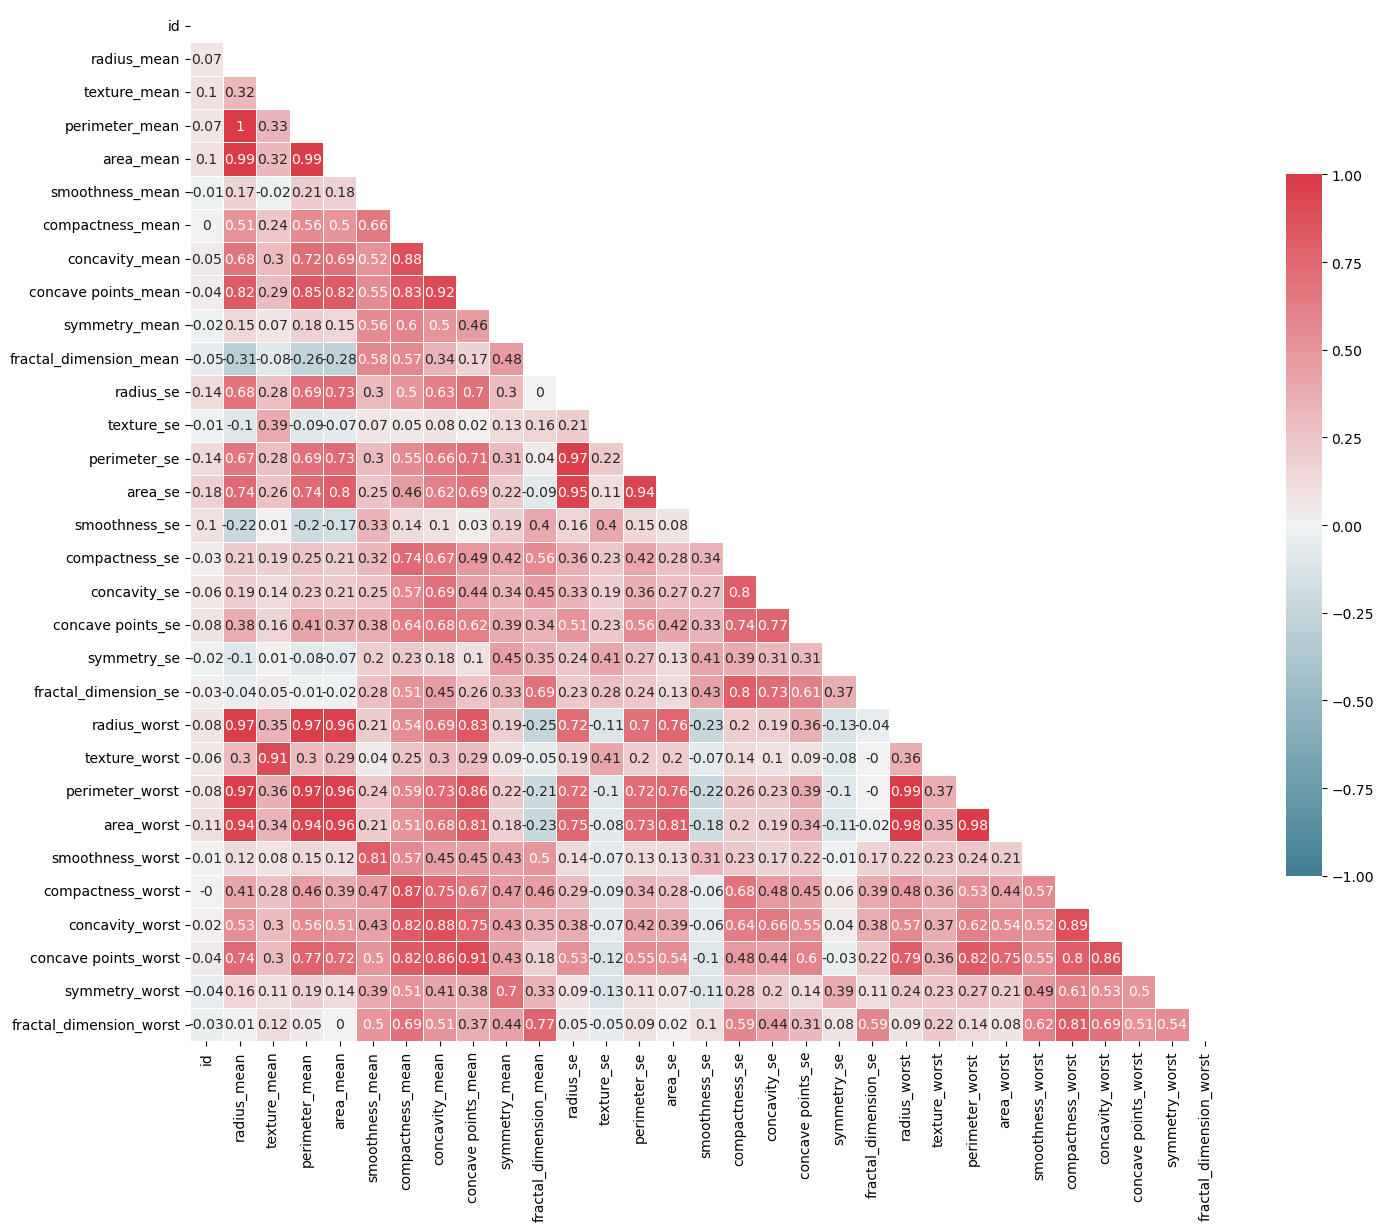

In [16]:
# Mask for the upper triangle
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(15, 15))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

### Drop Unimportant Column in DataFrame

In [17]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

### After Removing Less Import Col Check Correlation Using Heatmap

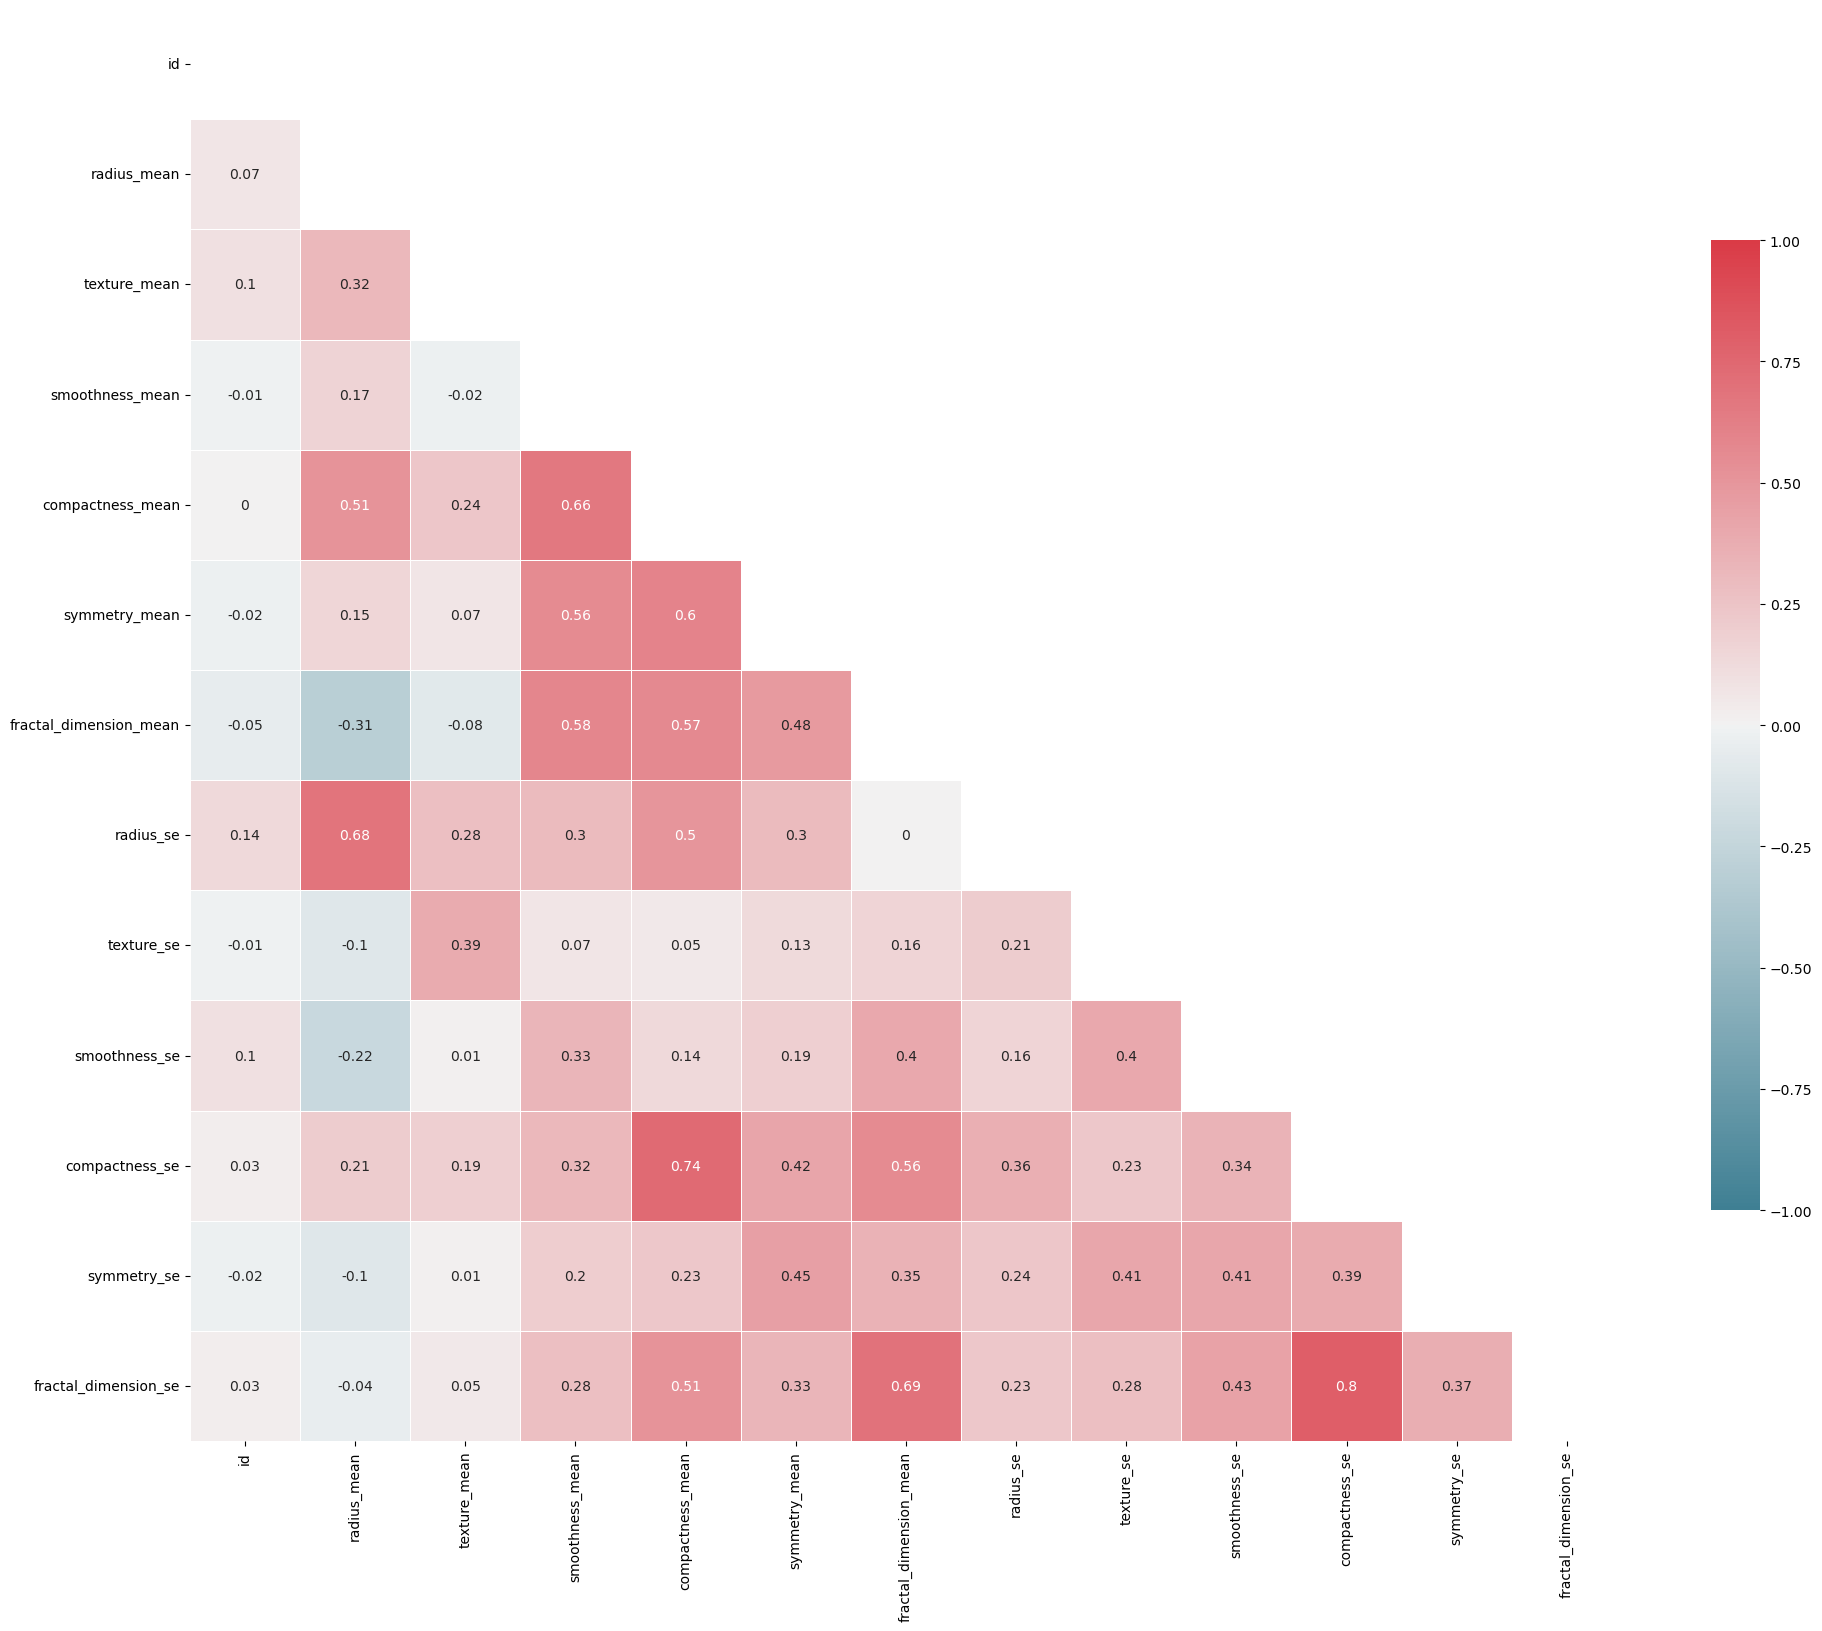

In [18]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

### Check Outliers And Remove Using Boxplot

In [19]:
#find outliers

In [20]:
print(df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


Text(0.5, 1.0, 'Box Plot of All Columns')

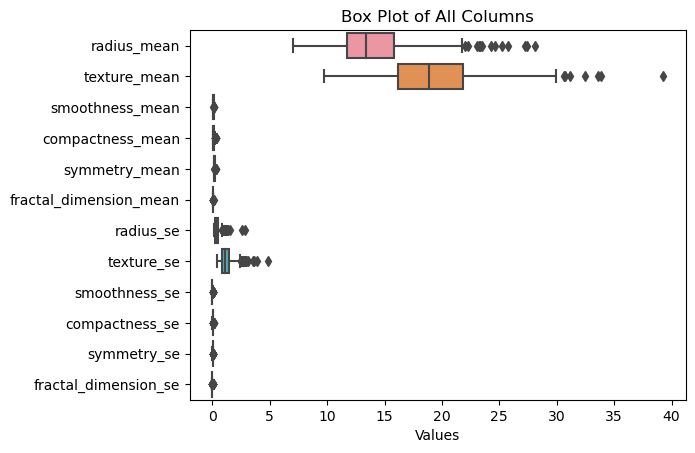

In [21]:
#Find Outliers
l=['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se']

sns.boxplot(data=df[l], orient='h')  # 'orient' is set to 'h' for horizontal box plots
plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [22]:
#Removing outliers
l=[ 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se']

for i in l:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

Text(0.5, 1.0, 'Box Plot of All Columns')

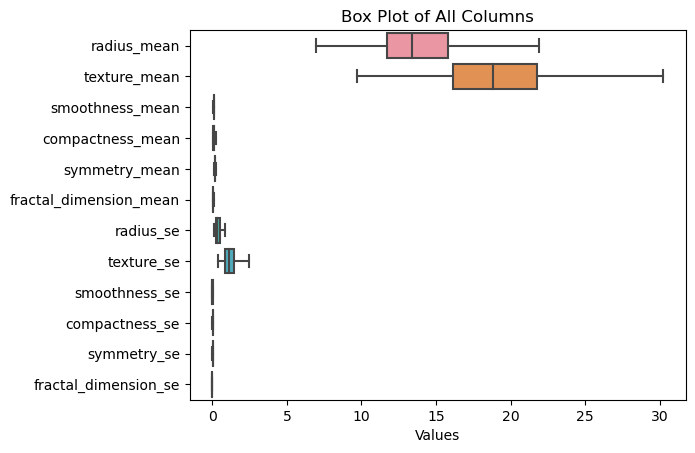

In [23]:
#After removing outliers
l=['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se']

sns.boxplot(data=df[l], orient='h')  # 'orient' is set to 'h' for horizontal box plots
plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   smoothness_mean         569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   symmetry_mean           569 non-null    float64
 7   fractal_dimension_mean  569 non-null    float64
 8   radius_se               569 non-null    float64
 9   texture_se              569 non-null    float64
 10  smoothness_se           569 non-null    float64
 11  compactness_se          569 non-null    float64
 12  symmetry_se             569 non-null    float64
 13  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory

In [25]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Encoding For Dignosis Column

In [26]:
#Encoing
df["diagnosis"]=df["diagnosis"].replace({"M":0,"B":1})

### Saperate Target Column And Feature Column(Target=x,Feature=y)

In [27]:
#Feature and Target column
x=df.iloc[:,2:14]
# y=df.iloc[:,1:2]
y=df["diagnosis"]

In [28]:
x

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,17.99,10.38,0.118400,0.22862,0.2419,0.07871,0.84865,0.90530,0.006399,0.049040,0.03003,0.006193
1,20.57,17.77,0.084740,0.07864,0.1812,0.05667,0.54350,0.73390,0.005225,0.013080,0.01389,0.003532
2,19.69,21.25,0.109600,0.15990,0.2069,0.05999,0.74560,0.78690,0.006150,0.040060,0.02250,0.004571
3,11.42,20.38,0.133695,0.22862,0.2464,0.07875,0.49560,1.15600,0.009110,0.061505,0.03596,0.008023
4,20.29,14.34,0.100300,0.13280,0.1809,0.05883,0.75720,0.78130,0.011490,0.024610,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.111000,0.11590,0.1726,0.05623,0.84865,1.25600,0.010300,0.028910,0.01114,0.004239
565,20.13,28.25,0.097800,0.10340,0.1752,0.05533,0.76550,2.43415,0.005769,0.024230,0.01898,0.002498
566,16.60,28.08,0.084550,0.10230,0.1590,0.05648,0.45640,1.07500,0.005903,0.037310,0.01318,0.003892
567,20.60,29.33,0.117800,0.22862,0.2397,0.07016,0.72600,1.59500,0.006522,0.061505,0.02324,0.006185


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

### Scaling Using MinMax Scaler

In [30]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
dtypes: float64(12)
memory usage: 53.5 KB


## Train_Test_split:

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 12)
(114, 12)
(455,)
(114,)


## Model Building

In [33]:
#Create object
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
dt=DecisionTreeClassifier()


In [34]:
#we r ctreating Function for all model
def mymodel(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    print(classification_report(y_test,ypred))
    return model

### Logistic Regression

In [35]:
#Logreg Algo
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.87      0.96      0.91        70

    accuracy                           0.89       114
   macro avg       0.89      0.86      0.88       114
weighted avg       0.89      0.89      0.88       114



LogisticRegression()

In [36]:
logreg1=LogisticRegression(max_iter=1000) # Increase the max_iter value
logreg1

LogisticRegression(max_iter=1000)

In [37]:
logreg1.fit(x_train, y_train)
y_pred1 = logreg1.predict(x_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.87      0.96      0.91        70

    accuracy                           0.89       114
   macro avg       0.89      0.86      0.88       114
weighted avg       0.89      0.89      0.88       114

[[34 10]
 [ 3 67]]


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

logreg11 = LogisticRegression()
grid_search = GridSearchCV(logreg11, param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_logreg = grid_search.best_estimator_

y_pred2 = best_logreg.predict(x_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.91      0.90      0.91        70

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114

[[38  6]
 [ 7 63]]


In [39]:
#Bagging with Logreg
from sklearn.ensemble import BaggingClassifier

In [40]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(x_train,y_train)
ypred=bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.87      0.96      0.91        70

    accuracy                           0.89       114
   macro avg       0.89      0.86      0.88       114
weighted avg       0.89      0.89      0.88       114



### Knn Algorithm

In [41]:
#Knn Algo
mymodel(knn)
    

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.92      0.97      0.94        70

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



KNeighborsClassifier()

In [76]:
# Without this, KNN wasn't working
x_train = np.array(x_train)
x_test = np.array(x_test)

model33=KNeighborsClassifier(n_neighbors=5)     #  try different values of n for high accuracy 
model33

KNeighborsClassifier()

In [77]:
model33.fit(x_train, y_train)
y_pred4 = model33.predict(x_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.92      0.97      0.94        70

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

[[38  6]
 [ 2 68]]


### Bagging with Knn

In [78]:

knn=BaggingClassifier(KNeighborsClassifier())
bg.fit(x_train,y_train)
ypred=bg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.86      0.96      0.91        70

    accuracy                           0.88       114
   macro avg       0.89      0.85      0.87       114
weighted avg       0.88      0.88      0.87       114



### Suport Vector Machine

In [45]:
#SVM
mymodel(svc)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.92      0.96      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



SVC()

In [82]:
model3=SVC()

In [47]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.92      0.96      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

[[38  6]
 [ 3 67]]


In [92]:
svm = SVC()

param_grid = {
    'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
    'gamma': ['auto','scale'],
      'kernel': ['rbf','linear','poly','sigmoid']
}



grid_search = GridSearchCV(svm, param_grid,scoring='accuracy', n_jobs=-1)


grid_search.fit(x, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Parameter :", best_params)
print("Scores:", best_score)

best_model = grid_search.best_estimator_
print(best_model)




Parameter : {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Scores: 0.9401956217978574
SVC(C=1)


### Decision Tree

In [48]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.88      0.93      0.90        70

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



DecisionTreeClassifier()

In [49]:
model2=DecisionTreeClassifier()
model2

DecisionTreeClassifier()

In [50]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        44
           1       0.87      0.97      0.92        70

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114

[[34 10]
 [ 2 68]]


### Random Forest

In [51]:
#RandomForest Algo(Bagging of DT)
model3=RandomForestClassifier()
model3

RandomForestClassifier()

In [52]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.89      0.94      0.92        70

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114

[[36  8]
 [ 4 66]]


In [53]:
#Voting
from sklearn.ensemble import VotingClassifier

models=[]
acc=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Discision Tree",DecisionTreeClassifier()))

In [54]:
models

[('Logistic Regression', LogisticRegression()),
 ('Discision Tree', DecisionTreeClassifier())]

In [55]:
vc=VotingClassifier(estimators=models)
vc.fit(x_train,y_train)
ypred=vc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.92      0.93      0.92        70

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



### Boosting

In [56]:
#Boosting
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ypred=ad.predict(x_test)
print(classification_report(y_test,ypred))



              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.89      0.91      0.90        70

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



In [57]:
#GBoost
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
gd.fit(x_train,y_train)
ypred=ad.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.89      0.91      0.90        70

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



In [58]:
#XGBoost
!pip install xgboost

from xgboost import XGBClassifier #this is highest accuracy score
xg=XGBClassifier()
xg.fit(x_train,y_train)
ypred=xg.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.90      0.93      0.92        70

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



### Accuracy Score--

###
1.Logistic Regresion-89%

2.Knn-91%

3.SVM-94%

4.DT-89%

5.Random Forest-91%



## Highest Accuracy Classification and its Score is:-

SVM Classification Algo. Score is 94%. 

   ## Thank You!!